In [1]:
import pandas as pd
import os
import matplotlib

In [2]:
path_to_training = os.path.join('data', 'train.csv')
path_to_test = os.path.join('data', 'test.csv')


In [3]:
df_training = pd.read_csv(path_to_training)
df_test = pd.read_csv(path_to_training)

C:\Users\ZBlas\AppData\Local\Temp\ipykernel_13896\1796590952.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_training = pd.read_csv(path_to_training)
C:\Users\ZBlas\AppData\Local\Temp\ipykernel_13896\1796590952.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(path_to_training)


In [4]:
df = pd.concat([df_training, df_test], axis=0)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  object 
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  object 
 8   Monthly_Inhand_Salary     169996 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              177184 non-null  object 

In [6]:
print(df['Age'].describe())

count     200000
unique      1788
top           38
freq        5666
Name: Age, dtype: object


<Axes: >

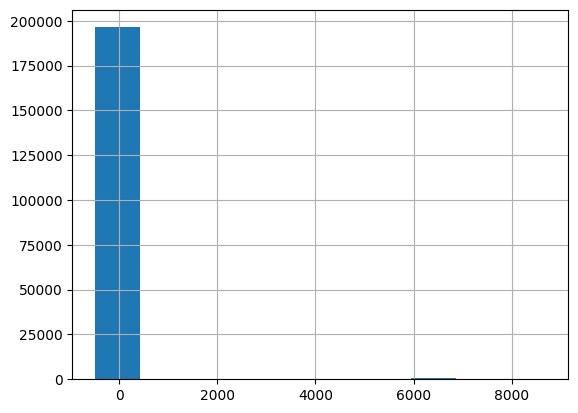

In [7]:
df['Age'] = df['Age'].apply(lambda x: float(x.rstrip('_')))
df['Age'].hist()

In [8]:
print(df['Age'].describe())

count    200000.000000
mean        110.649700
std         686.243001
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64


In [9]:
from utils.cleaning_tools import voter

In [10]:
vt_dict = voter(df, 'Customer_ID', 'Age')
df['Age_Unified'] = df['Customer_ID'].map(vt_dict)


<Axes: >

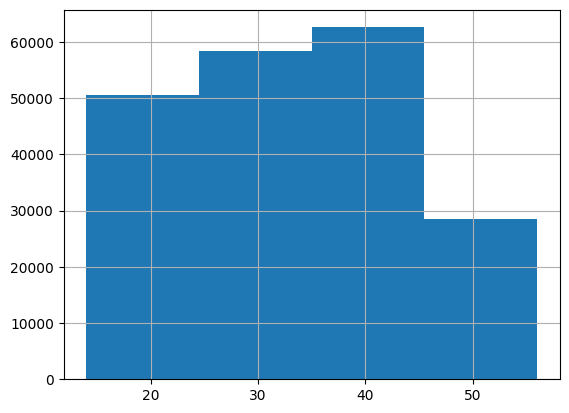

In [11]:
df['Age_Unified'].hist(bins=4)

In [12]:
df['Age'].describe()

count    200000.000000
mean        110.649700
std         686.243001
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  float64
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  object 
 8   Monthly_Inhand_Salary     169996 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              177184 non-null  object 

In [14]:
CID_MIS_vt_list = voter(df, 'Customer_ID', 'Monthly_Inhand_Salary')
#print(CID_MIS_vt_list)
#CID_MIS_vt

In [15]:
from utils.cleaning_tools import stratified_NaN_filler
df = stratified_NaN_filler(df, 'Customer_ID', 'Monthly_Inhand_Salary', CID_MIS_vt_list)

<Axes: >

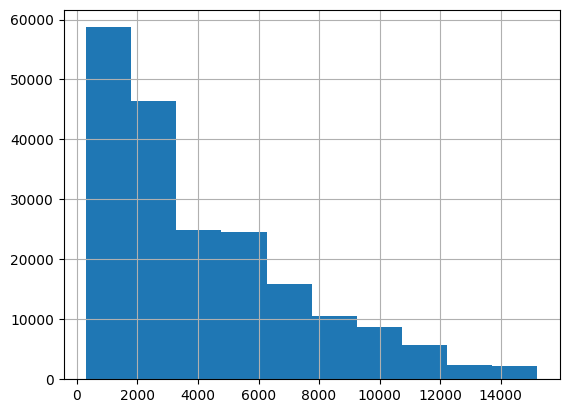

In [16]:
df['Monthly_Inhand_Salary'].hist()

In [17]:
for column in df.columns.tolist():
    df[column] = df[column].apply(lambda x: x.strip('_') if isinstance(x, str) else x)

In [18]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Unified
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,23.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,23.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,23.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,23.0


In [19]:
for index, value in enumerate(df['Annual_Income']):
    if isinstance(value, list):
        print(f"List found at index {index}: {value}")


In [ ]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '143162.64', ..., '37188.1', '20002.88',
       '39628.99'], shape=(13487,), dtype=object)

In [21]:
from utils.cleaning_tools import stratified_median_calculator

In [22]:
annual_income_encoding = voter(df, 'Occupation', 'Annual_Income')

In [23]:
df = stratified_NaN_filler(df, 'Occupation', 'Annual_Income', annual_income_encoding)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Unified
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,23.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,23.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,23.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,23.0


In [24]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'])


In [ ]:
df['Annual_Income'].describe()

count    2.000000e+05
mean     1.764157e+05
std      1.429614e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

<Axes: >

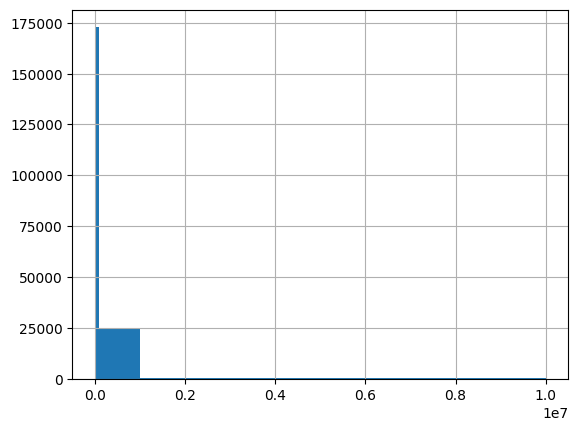

In [26]:
df['Annual_Income'].hist(bins=[0, 1000, 100000, 1000000, 10000000])

In [27]:
inhand_encoding = voter(df, 'Customer_ID', 'Monthly_Inhand_Salary')
print(inhand_encoding)

{'CUS_0x1000': 2706.1616666666664, 'CUS_0x1009': 4250.39, 'CUS_0x100b': 9549.7825, 'CUS_0x1011': 5208.8725, 'CUS_0x1013': 7962.415000000001, 'CUS_0x1015': 3725.585, 'CUS_0x1018': 5014.5675, 'CUS_0x1026': 14463.856666666668, 'CUS_0x102d': 7256.043333333334, 'CUS_0x102e': 4197.953333333334, 'CUS_0x1032': 5274.245, 'CUS_0x1037': 1086.42375, 'CUS_0x1038': 10959.43, 'CUS_0x103e': 8262.233333333334, 'CUS_0x1041': 894.1758333333332, 'CUS_0x1044': 2748.799166666666, 'CUS_0x1048': 3680.295, 'CUS_0x104a': 1461.4491666666663, 'CUS_0x104e': 1688.405833333333, 'CUS_0x104f': 992.73625, 'CUS_0x1051': 2859.518333333333, 'CUS_0x1056': 1196.8216666666667, 'CUS_0x1057': 7250.096666666667, 'CUS_0x105b': 2575.0175, 'CUS_0x105c': 10596.8, 'CUS_0x1063': 10628.896666666666, 'CUS_0x1069': 4799.445, 'CUS_0x106f': 11102.589999999998, 'CUS_0x1075': 1933.468717801689, 'CUS_0x107c': 4179.2125, 'CUS_0x107e': 6269.9925, 'CUS_0x1087': 3377.7608333333333, 'CUS_0x108a': 2554.813823273585, 'CUS_0x1096': 1348.63, 'CUS_0x1

In [28]:
df = stratified_NaN_filler(df, 'Customer_ID', 'Monthly_Inhand_Salary', inhand_encoding)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Unified
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,23.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,23.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,23.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,23.0


In [29]:
df['Monthly_Inhand_Salary'].info()

<class 'pandas.core.series.Series'>
Index: 200000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count   Dtype  
--------------   -----  
200000 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  float64
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  float64
 8   Monthly_Inhand_Salary     200000 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              177184 non-null  object 

In [ ]:
df['Type_of_Loan'].fillna('Unknown')

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 200000, dtype: object

In [ ]:
df['Num_of_Delayed_Payment'].fillna(0)

0        7
1        0
2        7
3        4
4        0
        ..
99995    7
99996    7
99997    6
99998    0
99999    6
Name: Num_of_Delayed_Payment, Length: 200000, dtype: object

In [33]:
list_to_check = ['Changed_Credit_Limit', 'Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance', 'Num_Credit_Inquiries', 'Amount_invested_monthly']

In [ ]:
df[list_to_check].head()

,Changed_Credit_Limit,Credit_Mix,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Num_Credit_Inquiries,Amount_invested_monthly
0,11.27,,22 Years and 1 Months,High_spent_Small_value_payments,312.49408867943663,4.0,80.41529543900253
1,11.27,Good,NaN,Low_spent_Large_value_payments,284.62916249607184,4.0,118.28022162236736
2,,Good,22 Years and 3 Months,Low_spent_Medium_value_payments,331.2098628537912,4.0,81.699521264648
3,6.27,Good,22 Years and 4 Months,Low_spent_Small_value_payments,223.45130972736786,4.0,199.4580743910713
4,11.27,Good,22 Years and 5 Months,High_spent_Medium_value_payments,341.48923103222177,4.0,41.420153086217326


In [35]:
df[list_to_check].info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Changed_Credit_Limit     200000 non-null  object 
 1   Credit_Mix               200000 non-null  object 
 2   Credit_History_Age       181940 non-null  object 
 3   Payment_Behaviour        200000 non-null  object 
 4   Monthly_Balance          197600 non-null  object 
 5   Num_Credit_Inquiries     196070 non-null  float64
 6   Amount_invested_monthly  191042 non-null  object 
dtypes: float64(1), object(6)
memory usage: 12.2+ MB


In [36]:
for item in list_to_check:
    print(df[item].unique())

['11.27' '' '6.27' ... '17.509999999999998' '25.16' '21.17']


['' 'Good' 'Standard' 'Bad']
['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 8 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Years and 0 Months' '32 Years and 2 Months' '32 Years and 3 Months'
 '32 Years and 5 Months' '32 Years 

In [37]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [38]:
CCL_encoding = voter(df, 'Customer_ID', 'Changed_Credit_Limit')
df = stratified_NaN_filler(df, 'Customer_ID', 'Changed_Credit_Limit', CCL_encoding)

In [39]:
df['Changed_Credit_Limit'].describe()

count    200000.000000
mean         10.389023
std           6.783568
min          -6.490000
25%           5.340000
50%           9.400000
75%          14.850000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

In [40]:
df['Credit_Mix'].unique()

array(['', 'Good', 'Standard', 'Bad'], dtype=object)

In [41]:
credit_mix_encoding = voter(df, 'Customer_ID', 'Credit_Mix')

In [42]:
df = stratified_NaN_filler(df, 'Customer_ID', 'Credit_Mix', credit_mix_encoding)

In [43]:
#df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      shape=(98793,), dtype=object)

In [45]:
df['MB_numeric'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')


In [46]:
df['MB_numeric'].info()

<class 'pandas.core.series.Series'>
Index: 200000 entries, 0 to 99999
Series name: MB_numeric
Non-Null Count   Dtype  
--------------   -----  
197600 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [ ]:
monthly_balance_encoding = stratified_median_calculator(df, 'Occupation', 'MB_numeric')
print(monthly_balance_encoding)

{'': 337.5989887546831, 'Accountant': 339.6745656948433, 'Architect': 346.3621374972772, 'Developer': 335.6724451608019, 'Doctor': 332.7345104323182, 'Engineer': 336.85201655365665, 'Entrepreneur': 336.9630748678778, 'Journalist': 334.6500048439665, 'Lawyer': 334.51620793009135, 'Manager': 339.9462072079434, 'Mechanic': 329.738763051378, 'Media_Manager': 335.825424371804, 'Musician': 338.1943254640729, 'Scientist': 338.8489754533207, 'Teacher': 335.1783863619824, 'Writer': 336.62848904609075}


In [48]:
df = stratified_NaN_filler(df, 'Occupation', 'MB_numeric', monthly_balance_encoding)

In [49]:
df['MB_numeric'].info()

<class 'pandas.core.series.Series'>
Index: 200000 entries, 0 to 99999
Series name: MB_numeric
Non-Null Count   Dtype  
--------------   -----  
200000 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  float64
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  float64
 8   Monthly_Inhand_Salary     200000 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              177184 non-null  object 

In [ ]:
df[['Payment_Behaviour', 'Credit_History_Age', 'Type_of_Loan']].head()

,Payment_Behaviour,Credit_History_Age,Type_of_Loan
0,High_spent_Small_value_payments,22 Years and 1 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,Low_spent_Large_value_payments,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,Low_spent_Medium_value_payments,22 Years and 3 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,Low_spent_Small_value_payments,22 Years and 4 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,High_spent_Medium_value_payments,22 Years and 5 Months,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [53]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(
    lambda x: 'High_spent_Small_value_payments' if x == '!@9#%8' else x
)


In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [55]:
def splitter(string, idx):
    if isinstance(string, str):
        split = string.split()
        result = split[idx]
    else:
        result = string
    return result

In [ ]:
df['Credit_History_Age'].info()

<class 'pandas.core.series.Series'>
Index: 200000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count   Dtype 
--------------   ----- 
181940 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [57]:
df['Credit_History_Age_Year'] = df['Credit_History_Age'].apply(lambda x: splitter(x, 0))

In [58]:
df['Credit_History_Age_Year'] = pd.to_numeric(df['Credit_History_Age_Year'], errors='coerce')
df['Credit_History_Age_Year'].head()

0    22.0
1     NaN
2    22.0
3    22.0
4    22.0
Name: Credit_History_Age_Year, dtype: float64

In [59]:
df['Credit_History_Age_Month'] = df['Credit_History_Age'].apply(lambda x: splitter(x, 3))
df['Credit_History_Age_Month'] = pd.to_numeric(df['Credit_History_Age_Month'], errors='coerce')

In [ ]:
df['Credit_History_Age_Month'] = df['Credit_History_Age_Month'].apply(lambda x: x/12)
df['Credit_History_Age_Month'].head()

0    0.083333
1         NaN
2    0.250000
3    0.333333
4    0.416667
Name: Credit_History_Age_Month, dtype: float64

In [61]:
df['Credit_History_Age_Numeric'] = df['Credit_History_Age_Month'] + df['Credit_History_Age_Year']

In [62]:
df['Monthly_Balance'].head()

0    312.49408867943663
1    284.62916249607184
2     331.2098628537912
3    223.45130972736786
4    341.48923103222177
Name: Monthly_Balance, dtype: object

In [63]:
df['Monthly_Balance'] = df['MB_numeric']

In [64]:
ToL_encoding = voter(df, 'Customer_ID', 'Type_of_Loan')

In [65]:
#df['Type_of_Loan'].fillna('Undefinied')
df = stratified_NaN_filler(df, 'Customer_ID', 'Type_of_Loan', ToL_encoding)

In [66]:
df['Type_of_Loan'].info()

<class 'pandas.core.series.Series'>
Index: 200000 entries, 0 to 99999
Series name: Type_of_Loan
Non-Null Count   Dtype 
--------------   ----- 
177184 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [67]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [68]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'].fillna(0)

0        7.0
1        0.0
2        7.0
3        4.0
4        0.0
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    0.0
99999    6.0
Name: Num_of_Delayed_Payment, Length: 200000, dtype: float64

In [69]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [70]:
null_values_present = ['Num_Credit_Inquiries', 'Credit_History_Age_Numeric', 'Amount_invested_monthly']

In [71]:
for column in null_values_present:
    encoding = stratified_median_calculator(df, 'Customer_ID', column)
    df = stratified_NaN_filler(df, 'Customer_ID', column, encoding)


In [72]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)
df['Credit_History_Age'] = df['Credit_History_Age_Numeric']
df['Age'] = df['Age_Unified']


In [73]:
df = df.drop(['Credit_History_Age_Numeric', 'Credit_History_Age_Month', 'Credit_History_Age_Year', 'MB_numeric', 'Age_Unified'], axis='columns')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  float64
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  float64
 8   Monthly_Inhand_Salary     200000 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              200000 non-null  object 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>, <Axes: >]],
      dtype=object)

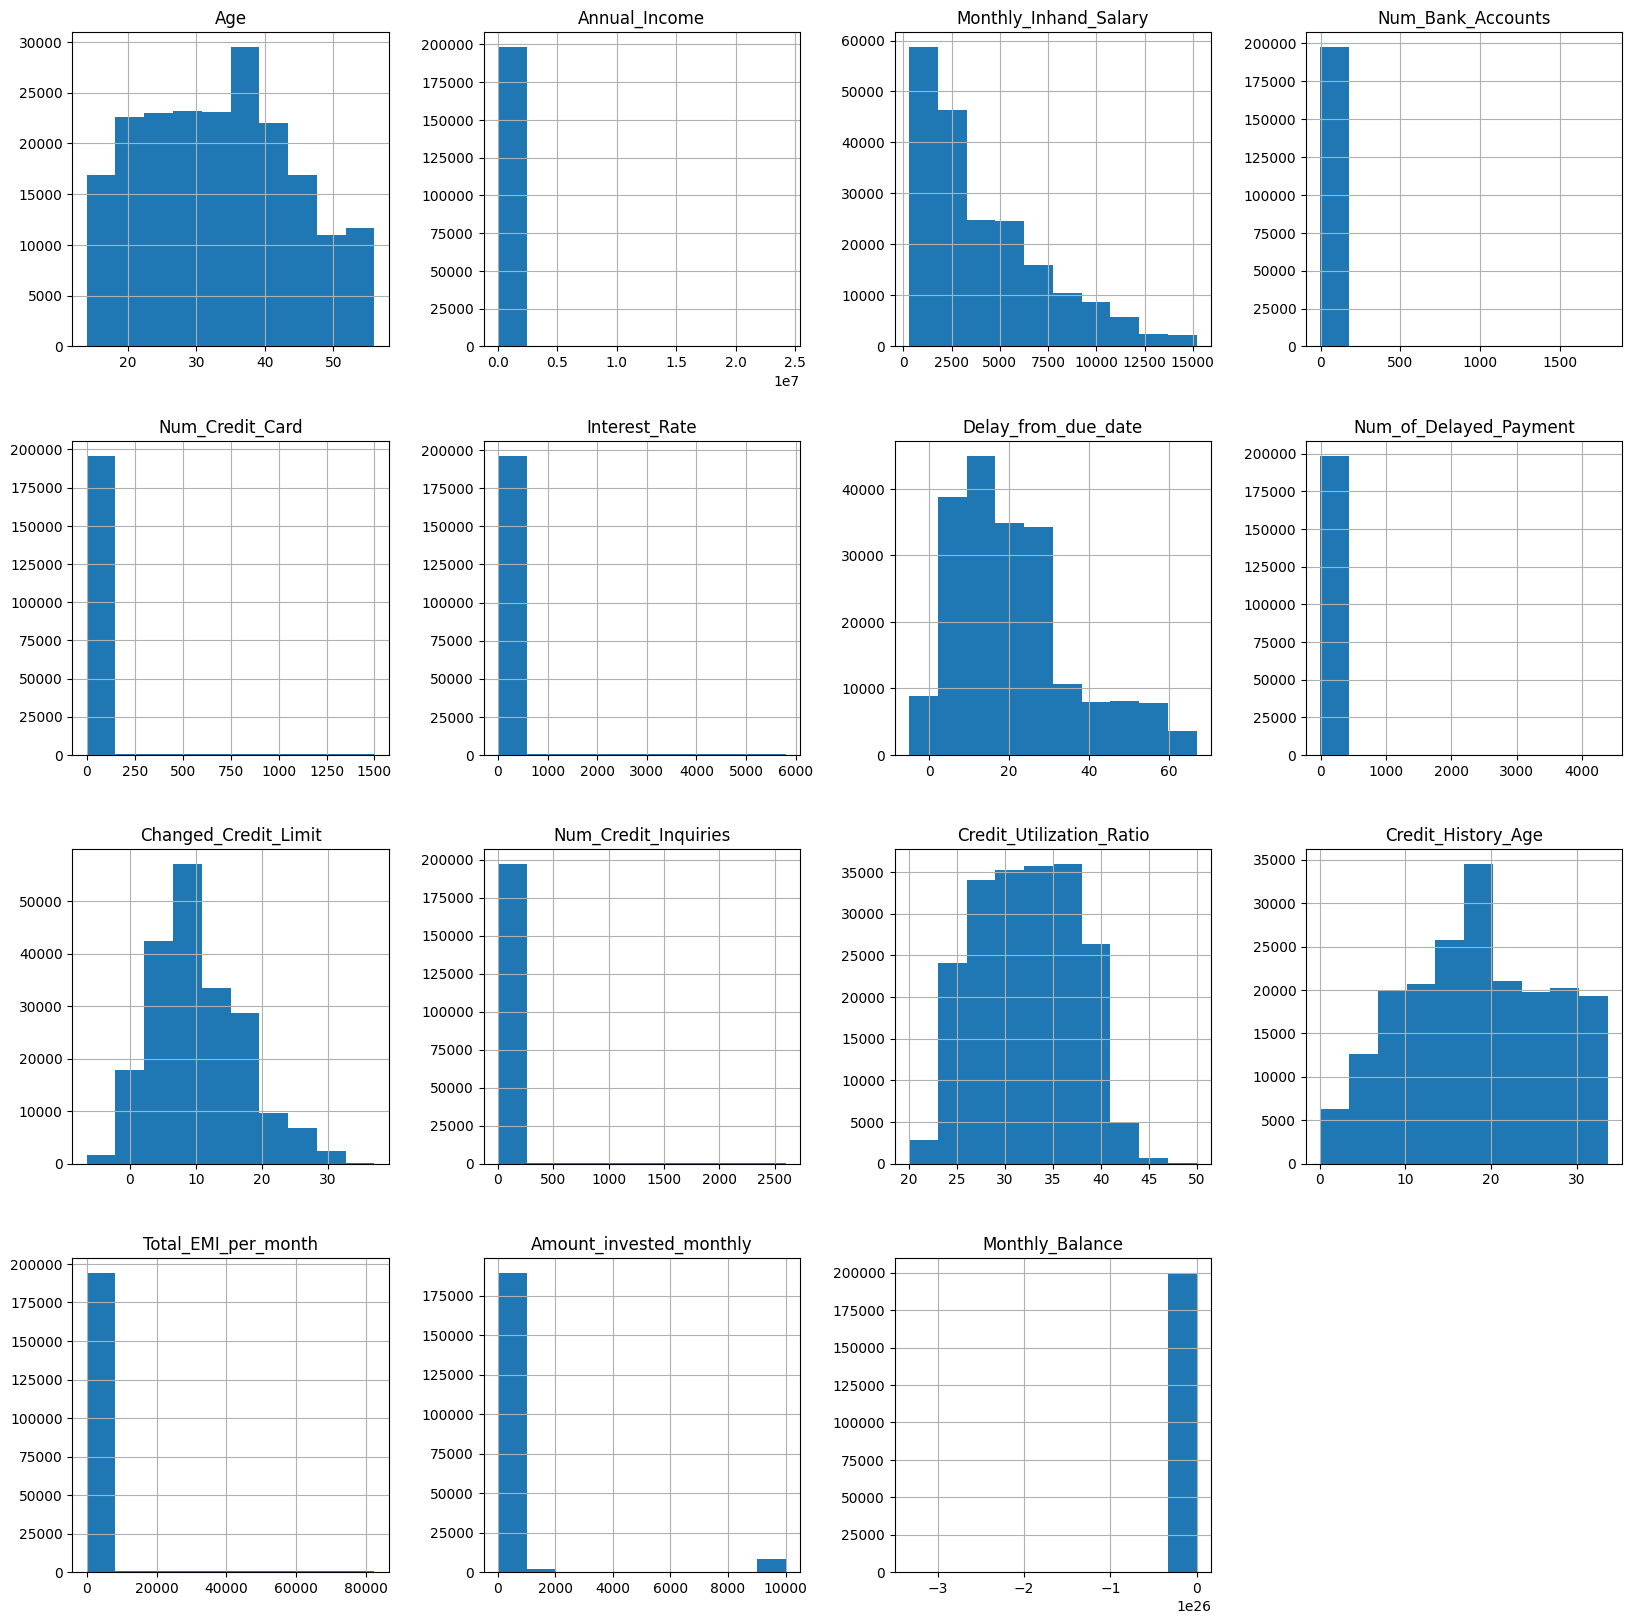

In [75]:
df.hist(figsize=(20, 20))

In [76]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05
mean,33.274560,1.764157e+05,4198.350924,17.091280,22.474430,72.466040,21.068780,28.75809,10.389023,27.321850,32.285173,18.433827,1403.118217,617.257610,-3.000000e+22
std,10.764412,1.429614e+06,3187.394047,117.404541,129.057087,466.421455,14.860067,218.11708,6.783568,191.294613,5.116862,8.306508,8306.020505,1999.672147,3.162143e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-5.000000,-3.00000,-6.490000,0.000000,20.000000,0.083333,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1626.761667,3.000000,4.000000,8.000000,10.000000,8.00000,5.340000,3.000000,28.052567,12.041667,30.306660,75.356284,2.708934e+02
50%,33.000000,3.757861e+04,3095.978333,6.000000,5.000000,13.000000,18.000000,13.00000,9.400000,6.000000,32.305784,18.250000,69.249473,136.173912,3.367570e+02
75%,42.000000,7.279092e+04,5961.637500,7.000000,7.000000,20.000000,28.000000,18.00000,14.850000,9.000000,36.496663,25.166667,161.224249,263.231662,4.676706e+02
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,4397.00000,36.970000,2597.000000,50.000000,33.666667,82331.000000,10000.000000,1.602041e+03
